<a href="https://colab.research.google.com/github/sunmarknatecom/computer_vision/blob/master/mnist_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train_reshape = X_train.reshape(-1, 28, 28, 1)
X_test_reshape = X_test.reshape(-1, 28, 28, 1)
Y_train_reshape = to_categorical(Y_train)
Y_test_reshape = to_categorical(Y_test)

Y_train_reshape = Y_train_reshape.astype('uint8')
Y_test_reshape = Y_test_reshape.astype('uint8')

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train = X_train_reshape[:50000,:]
X_val = X_train_reshape[50000:,:]
Y_train = Y_train_reshape[:50000,:]
Y_val = Y_train_reshape[50000:,:]

In [0]:
mean_val = np.mean(X_train, axis=0)
std_val = np.std(X_train)

X_train_normal = (X_train - mean_val)/std_val
X_val_normal = (X_val - mean_val)/std_val
X_test_normal = (X_test_reshape - mean_val)/std_val

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import time

In [6]:
model = Sequential()
model.add(Conv2D(32, (5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
callback_list = [ModelCheckpoint(filepath='cnn_checkpoint.h5', monitor='val_loss', save_best_only=True), TensorBoard(log_dir='log/{}'.format(time.asctime()))]

In [10]:
history = model.fit(X_train_normal, Y_train, batch_size=64, epochs=20, validation_data=(X_val_normal, Y_val), callbacks=callback_list)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 207us/sample - loss: 0.1382 - acc: 0.9571 - val_loss: 0.0745 - val_acc: 0.9795
Epoch 2/20
50000/50000 [==============================] - 3s 67us/sample - loss: 0.0504 - acc: 0.9843 - val_loss: 0.0379 - val_acc: 0.9890
Epoch 3/20
50000/50000 [==============================] - 3s 66us/sample - loss: 0.0361 - acc: 0.9891 - val_loss: 0.0335 - val_acc: 0.9908
Epoch 4/20
50000/50000 [==============================] - 3s 63us/sample - loss: 0.0277 - acc: 0.9911 - val_loss: 0.0306 - val_acc: 0.9918
Epoch 5/20
50000/50000 [==============================] - 3s 66us/sample - loss: 0.0239 - acc: 0.9923 - val_loss: 0.0414 - val_acc: 0.9897
Epoch 6/20
50000/50000 [==============================] - 3s 66us/sample - loss: 0.0215 - acc: 0.9930 - val_loss: 0.0353 - val_acc: 0.9909
Epoch 7/20
50000/50000 [==============================] - 3s 65us/sample - loss: 0.0180 - acc: 0.9944 - val_loss: 

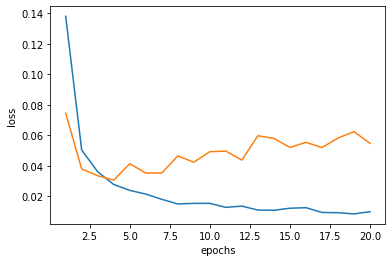

In [11]:
import matplotlib.pyplot as plt
epochs = np.arange(1,21)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()